In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})

In [31]:
trails_df = pd.read_pickle('../data/mtb_trails_df')

In [32]:
trails_df.head()

,id,name,type,summary,difficulty,stars,starVotes,location,url,imgSqSmall,...,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
0,3482113,Sandy Ridge Trail System - Full Tour,Ride,Excellent flow and downhill singletrack; an ex...,blueBlack,4.7,110,"Mount Hood Village, Oregon",https://www.mtbproject.com/trail/3482113/sandy...,https://cdn-files.apstatic.com/mtb/3681300_sqs...,...,15.7,2687,-2686,2594,1047,-122.0298,45.3805,Unknown,None,1970-01-01 00:00:00
1,4550979,Ape Canyon to Plains of Abraham - IMBA EPIC,Ride,An amazing journey back in time to the scene o...,blueBlack,4.7,78,"Amboy, Washington",https://www.mtbproject.com/trail/4550979/ape-c...,https://cdn-files.apstatic.com/mtb/7022792_sqs...,...,20.4,2648,-2647,4552,2909,-122.0923,46.1654,Unknown,None,1970-01-01 00:00:00
2,3896788,Browns Camp Loop,Ride,A 7.5-mile loop that travels over some of the ...,blueBlack,4.3,51,"Banks, Oregon",https://www.mtbproject.com/trail/3896788/brown...,https://cdn-files.apstatic.com/mtb/7012367_sqs...,...,7.4,1036,-1042,1923,1343,-123.3753,45.6226,Unknown,None,1970-01-01 00:00:00
3,7014484,Post Canyon Hot Lap,Ride,A good introductory loop to all that lower Pos...,blueBlack,4.7,28,"Hood River, Oregon",https://www.mtbproject.com/trail/7014484/post-...,https://cdn-files.apstatic.com/mtb/7017215_sqs...,...,9.8,1326,-1319,1951,972,-121.6004,45.6945,Unknown,None,1970-01-01 00:00:00
4,7014016,Catamount Trail Loop,Ride,A road climb to an aggressive cross-country tr...,blue,4.5,41,"Lyons, Oregon",https://www.mtbproject.com/trail/7014016/catam...,https://i.vimeocdn.com/video/596014062_640.jpg,...,12.3,1391,-1348,2438,1771,-122.6595,44.8523,Unknown,None,1970-01-01 00:00:00


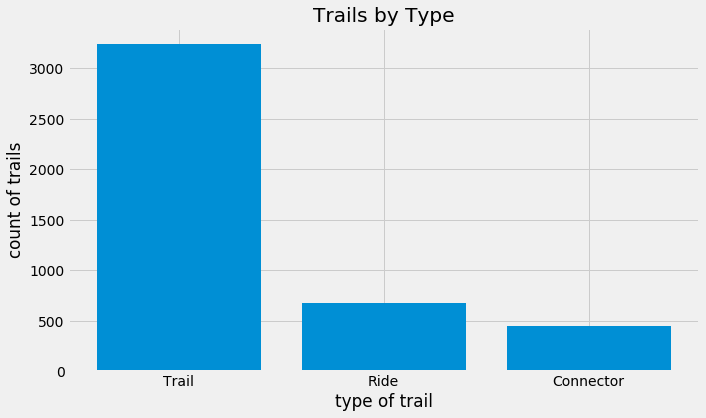

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

y = trails_df['type'].value_counts()
x = np.arange(len(y))
labels = y.index
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('type of trail')
ax.set_title('Trails by Type')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_type.png')

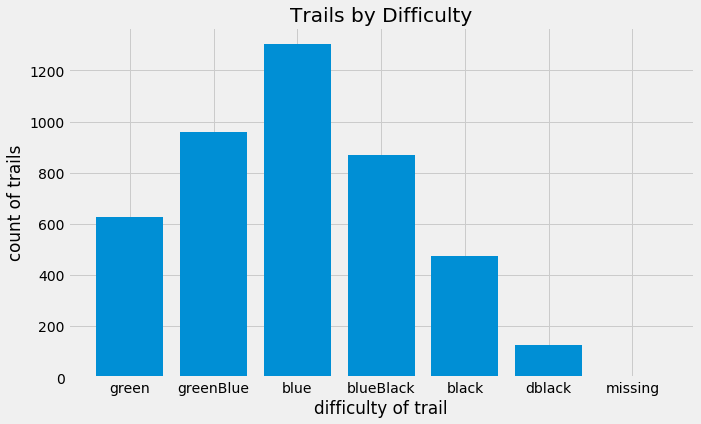

In [34]:
y = trails_df[['difficulty', 'id']].groupby(by='difficulty').count().reset_index()
order = np.array(['green', 'greenBlue', 'blue', 'blueBlack', 'black', 'dblack', 'missing'])
order_dict = {difficulty:np.argwhere(order==difficulty)[0][0] for difficulty in order}
y['order'] = np.zeros(len(y))
for i, diffy in enumerate(order):
    y.loc[y['difficulty']==diffy, 'order'] = order_dict[diffy]
y = y.sort_values(by='order')

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(y.shape[0])
labels = y['difficulty']
ax.bar(x, y['id'])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('difficulty of trail')
ax.set_title('Trails by Difficulty')
fig.savefig('../images/Trails_by_difficulty_ordered.png')

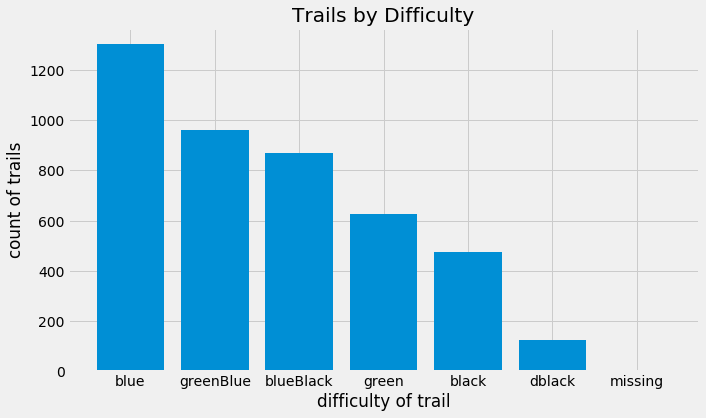

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

y = trails_df['difficulty'].value_counts()
x = np.arange(len(y))
labels = y.index
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('difficulty of trail')
ax.set_title('Trails by Difficulty')

fig.tight_layout(pad=1)
#fig.savefig('../images/Trails_by_difficulty.png')

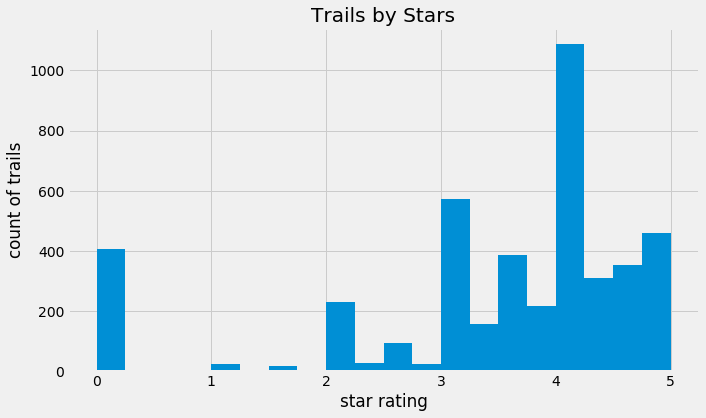

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(trails_df['stars'], bins=20)
ax.set_ylabel('count of trails')
ax.set_xlabel('star rating')
ax.set_title('Trails by Stars')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_stars.png')

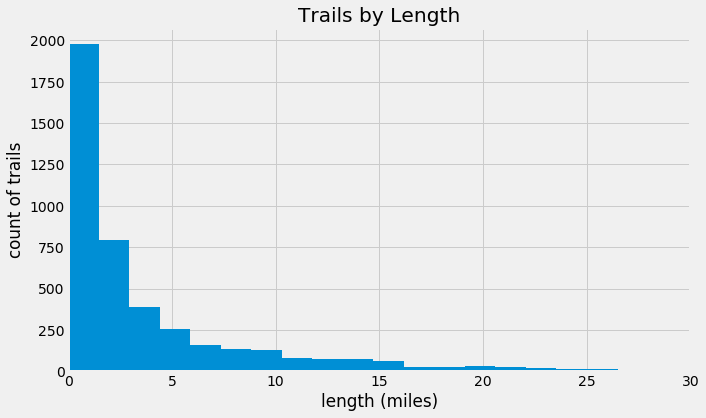

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(trails_df['length'], bins=200)
ax.set_xlim(0, 30)
ax.set_ylabel('count of trails')
ax.set_xlabel('length (miles)')
ax.set_title('Trails by Length')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_length.png')

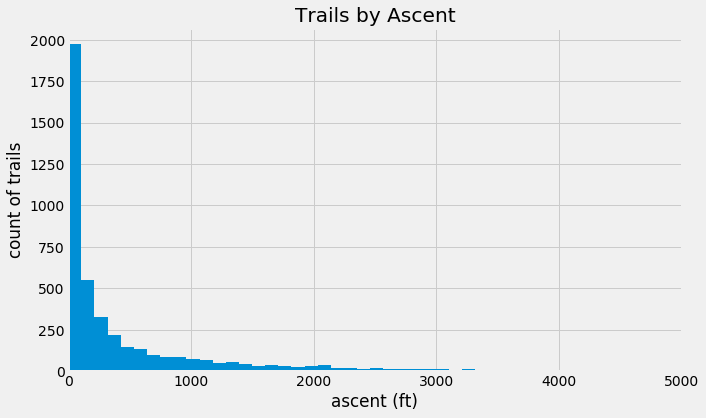

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(trails_df['ascent'], bins=200)
ax.set_xlim(0, 5000)
ax.set_ylabel('count of trails')
ax.set_xlabel('ascent (ft)')
ax.set_title('Trails by Ascent')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_ascent.png')

In [39]:
trails_df['elevation_delta'] = np.abs(trails_df['ascent'] + trails_df['descent'])
trails_df['elevation_delta_pct'] = trails_df['elevation_delta'] / (trails_df['ascent'] + 0.001)
trails_df['loop'] = np.where(trails_df['elevation_delta_pct']<0.01, 1, 0)
trails_df[['name', 'ascent', 'descent', 'elevation_delta', 'elevation_delta_pct', 'loop']]

,name,ascent,descent,elevation_delta,elevation_delta_pct,loop
0,Sandy Ridge Trail System - Full Tour,2687,-2686,1,0.000372,1
1,Ape Canyon to Plains of Abraham - IMBA EPIC,2648,-2647,1,0.000378,1
2,Browns Camp Loop,1036,-1042,6,0.005792,1
3,Post Canyon Hot Lap,1326,-1319,7,0.005279,1
4,Catamount Trail Loop,1391,-1348,43,0.030913,0
...,...,...,...,...,...,...
4360,Main Parking Lot Connector Trail,1,0,1,0.999001,0
4361,Main Campground Connector,0,-14,14,14000.000000,0
4362,Pink Trail Cutoff,0,-1,1,1000.000000,0
4363,Blue Trail Cutoff,0,-3,3,3000.000000,0


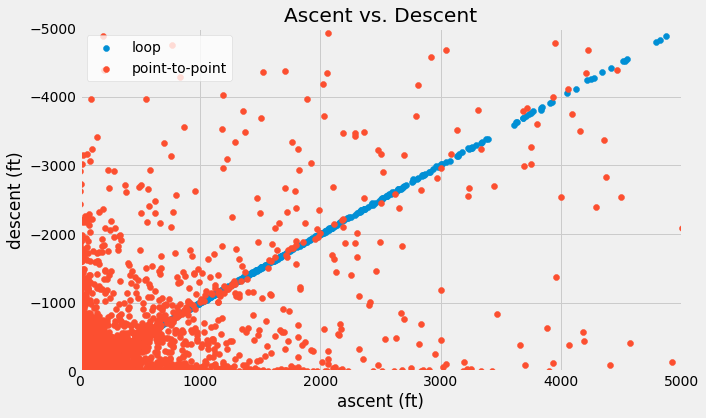

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(trails_df[trails_df['loop']==1]['ascent'], trails_df[trails_df['loop']==1]['descent'], label='loop')
ax.scatter(trails_df[trails_df['loop']==0]['ascent'], trails_df[trails_df['loop']==0]['descent'], label='point-to-point')
ax.set_xlim(0, 5000)
ax.set_ylim(0, -5000)
ax.set_ylabel('descent (ft)')
ax.set_xlabel('ascent (ft)')
ax.set_title('Ascent vs. Descent')
ax.legend(loc='upper left', facecolor='white')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_ascent_v_descent.png')

In [41]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.hist(trails_df[trails_df['elevation_delta_pct']<1]['elevation_delta_pct'], bins=100)
#ax.set_xlim(0, 0.25)

top words hist ... word cloud...  stop words
PCA chart? clusters?
n-grams
stop words
CV vs TF-IDF

In [42]:
trails_df['state'] = trails_df.apply(lambda x: x['location'].split(',')[-1], axis=1)

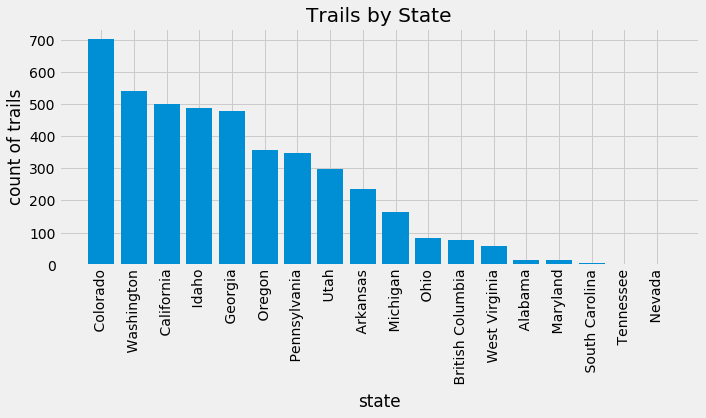

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
y = trails_df['state'].value_counts()
x = np.arange(len(y))
labels = y.index
ax.bar(x, y)
plt.xticks(x, labels, rotation='vertical')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('state')
ax.set_title('Trails by State')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_state.png')

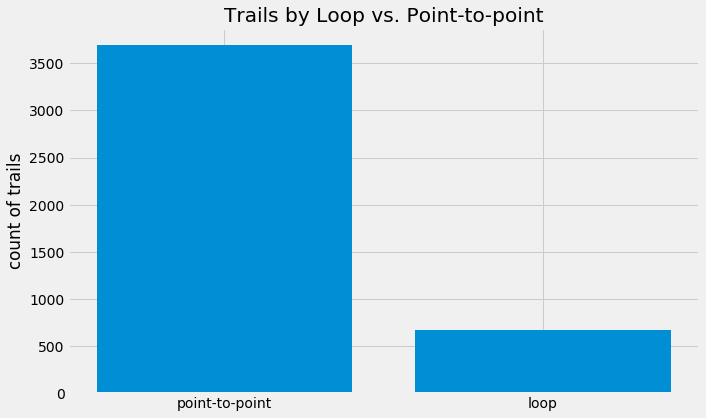

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
y = trails_df['loop'].value_counts()
x = np.arange(len(y))
labels = ['point-to-point', 'loop']
ax.bar(x, y)
plt.xticks(x, labels)
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
#ax.set_xlabel('Loop')
ax.set_title('Trails by Loop vs. Point-to-point')

fig.tight_layout(pad=1)
fig.savefig('../images/Trails_by_loop.png')

In [45]:
trails_df['summary_length'] = trails_df['summary'].apply(lambda x: len(x))

trails_df['no_summary'] = \
    np.where(\
             (trails_df.apply(lambda x: x['summary'].split(' ')[0], axis=1)=="Needs") | \
             (trails_df.summary_length == 0), \
             1, 0)
trails_df['no_summary'].sum()

728

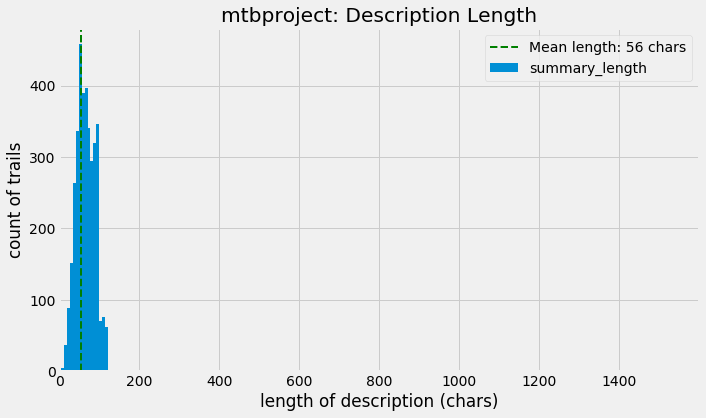

In [46]:
y = trails_df[trails_df['no_summary']==0]['summary_length']
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(y, bins=20)
ax.set_xlim(0, 1600)
ax.set_xticks(np.arange(0, 1600, 200))
ax.set_ylabel('count of trails')
ax.set_xlabel('length of description (chars)')
avg = round(trails_df['summary_length'].mean())
ax.axvline(x=avg, linestyle='--', linewidth=2, label=f'Mean length: {avg} chars', color='g')
ax.set_title('mtbproject: Description Length')
ax.legend()

fig.tight_layout(pad=1)
fig.savefig('../images/description_length.png')

In [47]:
trails_df.to_pickle('../data/mtb_trails_df_2')

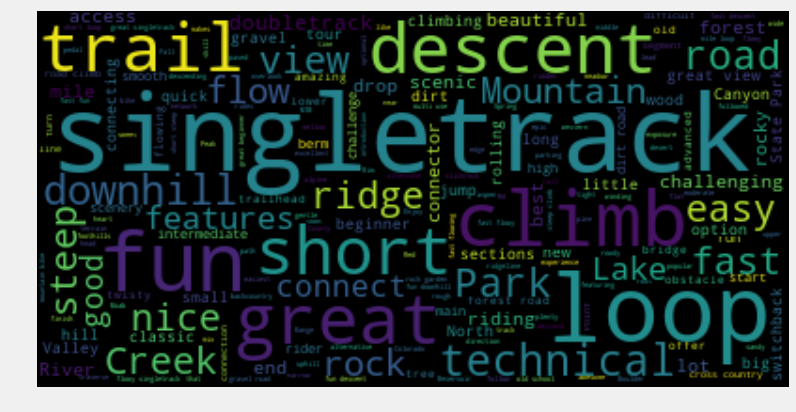

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english'))
gensim_stopwords = STOPWORDS
my_stopwords = set(['trail', 'ride', 'area', 'route', 'way', 'feature', 'section', 'ride', 'riding'\
                    'north', 'south', 'east', 'west'])
all_stopwords = my_stopwords.union(nltk_stopwords.union(gensim_stopwords))

text = ''
for desc in trails_df[trails_df['no_summary']==0]['summary']:
    text += desc
wordcloud = WordCloud(stopwords=all_stopwords).generate(text)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off');

In [49]:
wordcloud.to_file("../images/mtbproject_wordcloud.png")

In [56]:
run mtb_sklearn_lda.py

Topic 0:
['climb' 'park' 'descent' 'fun' 'steep' 'ridge' 'long' 'scenic' 'river'
 'road']
Topic 1:
['great' 'road' 'short' 'views' 'creek' 'lake' 'nice' 'doubletrack'
 'access' 'connector']
Topic 2:
['fun' 'technical' 'downhill' 'fast' 'mountain' 'good' 'flowy' 'rock'
 'miles' 'flow']
Model perplexity: 600.587


In [57]:
y = trails_df_with_summary['difficulty'].map({'blueBlack': 'indigo', 'blue': 'mediumblue', 'black':'black', \
                                              'greenBlue':'deepskyblue', 'green':'limegreen', 'dblack':'white', 'missing':'tan'})

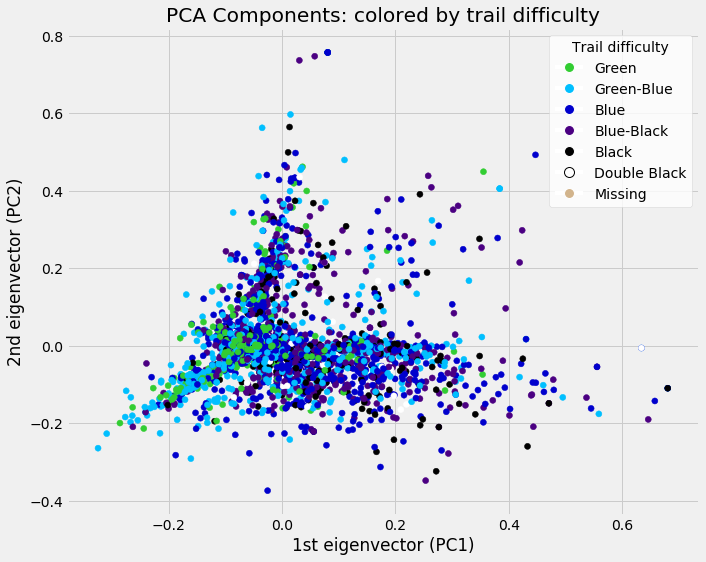

In [58]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Green',
                          markerfacecolor='limegreen', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Green-Blue',
                          markerfacecolor='deepskyblue', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='Blue',
                          markerfacecolor='mediumblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Blue-Black',
                          markerfacecolor='indigo', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Black',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Double Black',
                          markerfacecolor='white', markeredgecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Missing',
                          markerfacecolor='tan', markersize=10)]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y)
ax.set_title("PCA Components: colored by trail difficulty")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements, facecolor='w', title='Trail difficulty')
fig.tight_layout(pad=1)
fig.savefig('../images/PCA_difficulty.png');

In [122]:
colors = ['red', 'orange', 'yellow', 'limegreen', 'blue', 'purple', 'black', 'white', 'cyan', 'pink', 'peru']
state_dict = {state: colors[ind%11] for ind, state in enumerate(trails_df_with_summary['state'].unique())}
y2 = trails_df_with_summary['state'].map(state_dict)
state_dict

{' Oregon': 'red',
 ' Washington': 'orange',
 ' Colorado': 'yellow',
 ' Utah': 'limegreen',
 ' Ohio': 'blue',
 ' Maryland': 'purple',
 ' Pennsylvania': 'black',
 ' West Virginia': 'white',
 ' California': 'cyan',
 ' British Columbia': 'pink',
 ' Idaho': 'peru',
 ' Nevada': 'red',
 ' Georgia': 'orange',
 ' Alabama': 'yellow',
 ' Tennessee': 'limegreen',
 ' South Carolina': 'blue',
 ' Arkansas': 'purple',
 ' Michigan': 'black'}

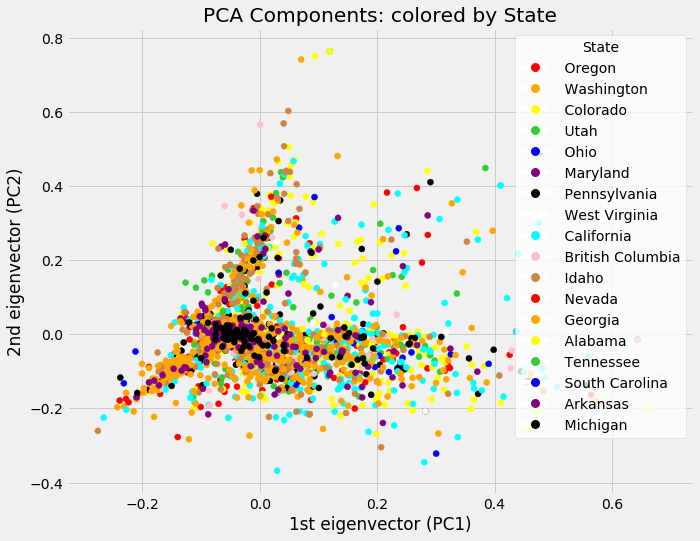

In [123]:
legend_elements2 = []
for state, color in state_dict.items():
    line = Line2D([0], [0], marker='o', color='w', label=state,
                          markerfacecolor=color, markersize=10)
    legend_elements2.append(line)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y2)
ax.set_title("PCA Components: colored by State")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements2, facecolor='w', title='State');

Text(0,0.5,'2nd eigenvector (PC2)')

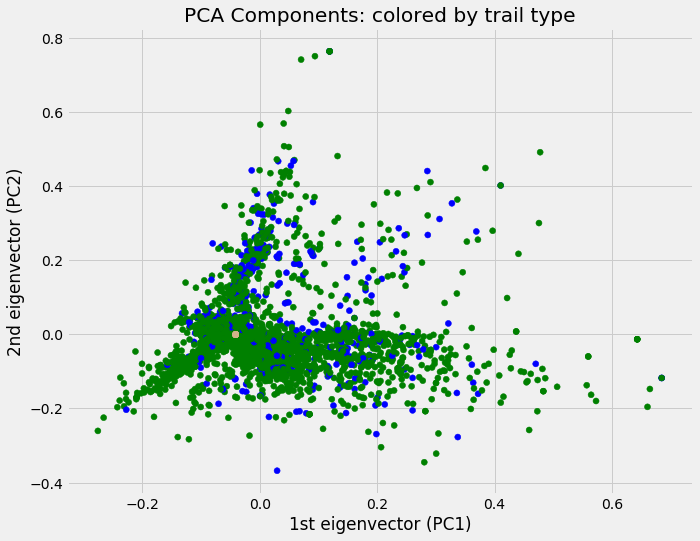

In [125]:
y3 = trails_df_with_summary['type'].map({'Trail': 'green', 'Ride': 'blue', 'Connector': 'tan'})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y3)
ax.set_title("PCA Components: colored by trail type")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
#ax.legend(handles=legend_elements3, facecolor='w', title='Trail difficulty')

#fig.savefig('../images/PCA_difficulty.png');